In [555]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [556]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

## Modelo univariado
variable x = LotArea, variable y = SalePrice

In [557]:
train_data=pd.read_csv("train.csv", encoding="latin1")
y = train_data.pop("SalePrice") #La variable respuesta
X = train_data.pop("OverallQual") 

xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [558]:
# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
price = yTrain.values.reshape(-1,1)
price_t = yTest.values.reshape(-1,1)
qual = xTrain.values.reshape(-1,1)
qual_t = xTest.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(qual, price)
price_pred = lm.predict(qual_t)

### Ecuación

In [559]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'price_pred = %0.4f*qual % + 0.4f '%(m,c)
print(label)

price_pred = 46056.2642*qual -98032.2563 


Text(0.5, 1.0, 'Test set quality vs sale price')

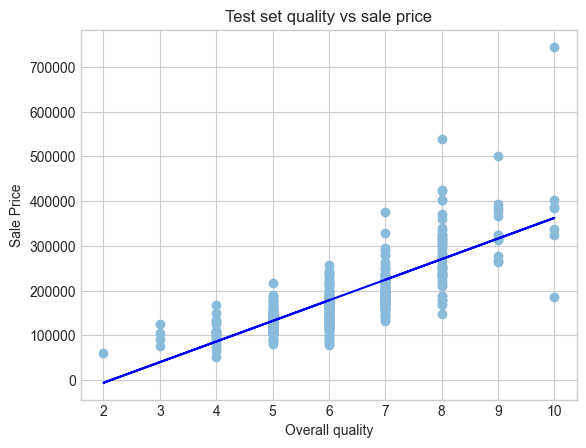

In [560]:
fig = plt.figure()
plt.scatter(qual_t, price_t) # Valor teórico (test)
plt.plot(qual_t, price_pred, color="blue") # valor predicho
plt.xlabel("Overall quality")
plt.ylabel("Sale Price")
plt.title("Test set quality vs sale price")

In [561]:
univariable_r2 = r2_score(price_t,price_pred)
univariable_mse = mean_squared_error(price_t,price_pred)
univariable_rmse = np.sqrt(univariable_mse)
print("R^2: %.2f"%univariable_r2)
print("MSE: %.2f"%univariable_mse)
print("RMSE: %.2f" %univariable_rmse)

R^2: 0.58
MSE: 2511033295.63
RMSE: 50110.21


### Residuales

In [562]:
residuales = price_t - price_pred

for i in range(0,len(price_t)):
    print(price_t[i], price_pred[i], " --> ", "\t\tDIFF:",residuales[i])

[214900] [224361.59304553]  -->  		DIFF: [-9461.59304553]
[193879] [224361.59304553]  -->  		DIFF: [-30482.59304553]
[315000] [270417.85724379]  -->  		DIFF: [44582.14275621]
[106000] [132249.064649]  -->  		DIFF: [-26249.064649]
[205950] [224361.59304553]  -->  		DIFF: [-18411.59304553]
[266000] [316474.12144206]  -->  		DIFF: [-50474.12144206]
[147000] [132249.064649]  -->  		DIFF: [14750.935351]
[170000] [224361.59304553]  -->  		DIFF: [-54361.59304553]
[134000] [132249.064649]  -->  		DIFF: [1750.935351]
[170000] [270417.85724379]  -->  		DIFF: [-100417.85724379]
[385000] [362530.38564032]  -->  		DIFF: [22469.61435968]
[137500] [178305.32884727]  -->  		DIFF: [-40805.32884727]
[120000] [178305.32884727]  -->  		DIFF: [-58305.32884727]
[139000] [178305.32884727]  -->  		DIFF: [-39305.32884727]
[104900] [132249.064649]  -->  		DIFF: [-27349.064649]
[75000] [86192.80045074]  -->  		DIFF: [-11192.80045074]
[135000] [132249.064649]  -->  		DIFF: [2750.935351]
[235000] [178305.32884727]

In [563]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, price_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 224
Valor real: [745000]
Valor predicho: [362530.38564032]
Diferencia máxima: [382469.61435968]


Text(0, 0.5, 'Residuales')

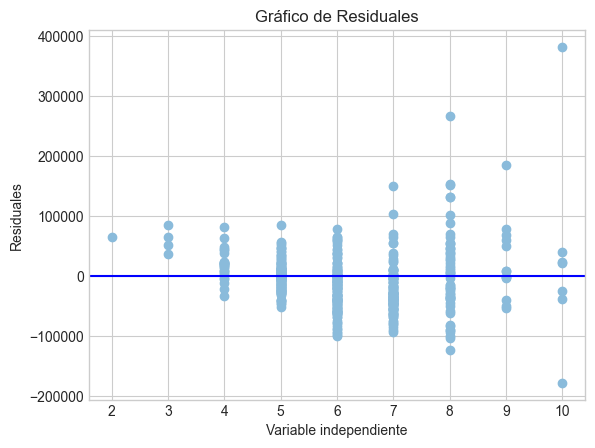

In [564]:
plt.plot(qual_t,residuales, 'o')
plt.axhline(0, color = "blue")
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

## Modelo multivariable

Separación de variables numéricas

In [565]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_cuantitativas = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Quitar algunas columnas con impacto reducido
columnas_cuantitativas.remove("Id")
columnas_cuantitativas.remove("MSSubClass")
columnas_cuantitativas.remove("FullBath")
columnas_cuantitativas.remove("HalfBath")
columnas_cuantitativas.remove("BedroomAbvGr")
columnas_cuantitativas.remove("KitchenAbvGr")
columnas_cuantitativas.remove("TotRmsAbvGrd")
columnas_cuantitativas.remove("Fireplaces")
columnas_cuantitativas.remove("LotFrontage")
columnas_cuantitativas.remove("MasVnrArea")
columnas_cuantitativas.remove("GarageYrBlt")

_train = train_data[columnas_cuantitativas]

# Eliminar columnas que contienen NaN
_train = _train.dropna(axis=1)

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

y = _train.pop("SalePrice")
X = _train

Columnas usadas (27) :
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [566]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scalerA = StandardScaler()  # Crear el escalador

X_train_scaled = scalerA.fit_transform(X_train)
X_test_scaled = scalerA.transform(X_test)

(1021, 26)
(438, 26)
(1021,)
(438,)


In [567]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo1 = LinearRegression()
modelo1.fit(X_train_scaled, price)
y_pred_modelo1 = modelo1.predict(X_test_scaled)


### Ecuación

In [568]:
# Obtener coeficientes e intercepto
intercept = modelo1.intercept_[0]  # Intercepto
coefs = modelo1.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 179210.8531 + (5319.1317 * LotArea) + (23172.0833 * OverallQual) + (5139.1774 * OverallCond) + (9972.5624 * YearBuilt) + (4820.3590 * YearRemodAdd) + (9363.9413 * BsmtFinSF1) + (-703.6933 * BsmtFinSF2) + (-371.1073 * BsmtUnfSF) + (9048.1178 * TotalBsmtSF) + (10045.3937 * 1stFlrSF) + (9674.3701 * 2ndFlrSF) + (-1719.2409 * LowQualFinSF) + (15383.9104 * GrLivArea) + (333.5074 * BsmtFullBath) + (-1493.4515 * BsmtHalfBath) + (1408.8495 * GarageCars) + (7322.6021 * GarageArea) + (2285.0177 * WoodDeckSF) + (-636.8337 * OpenPorchSF) + (163.3305 * EnclosedPorch) + (1486.0040 * 3SsnPorch) + (1818.5382 * ScreenPorch) + (2689.3262 * PoolArea) + (-880.5124 * MiscVal) + (-467.5691 * MoSold) + (-803.6797 * YrSold)


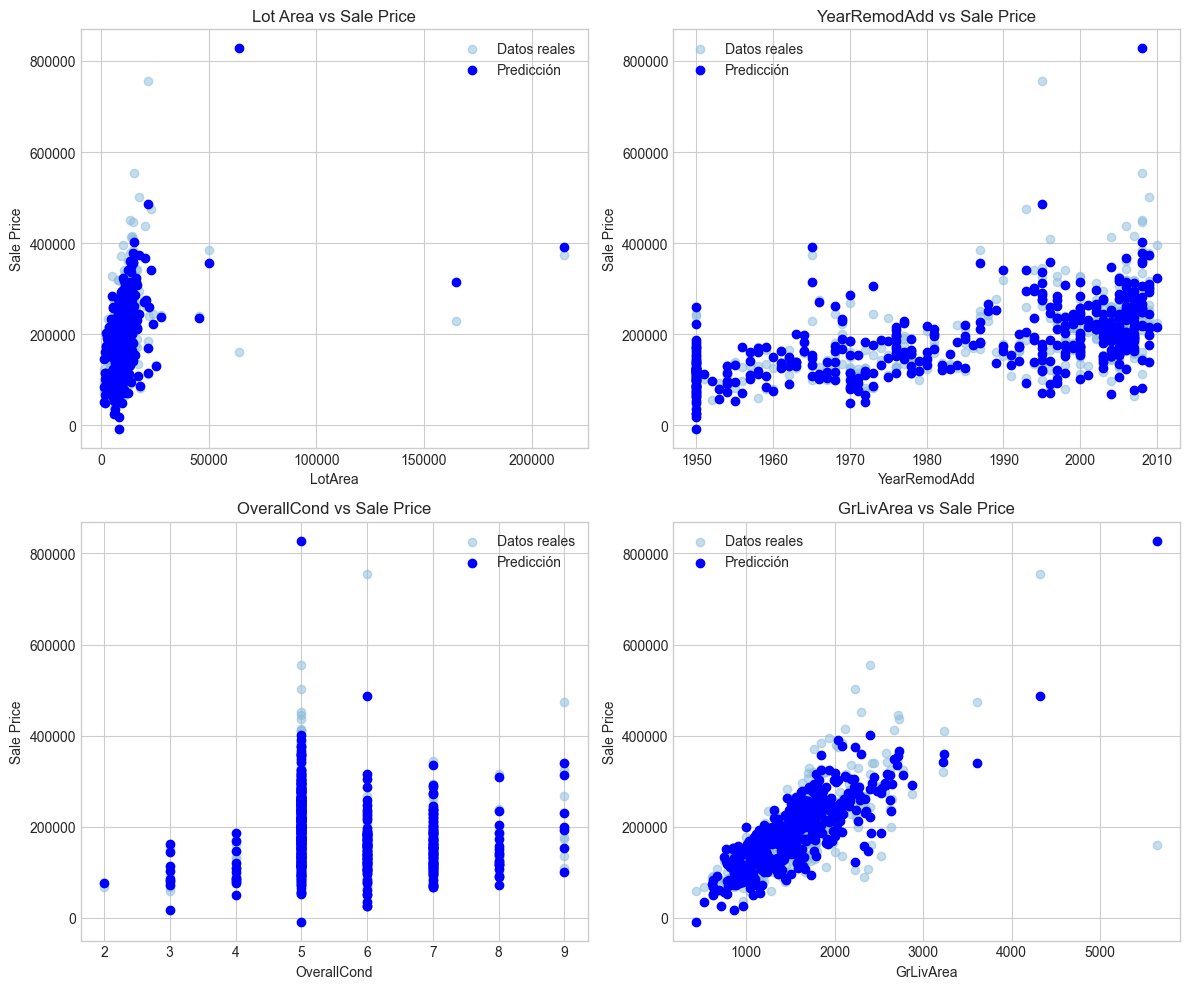

In [569]:
# Variables a graficar
variables = ["LotArea", "YearRemodAdd", "OverallCond", "GrLivArea"]
titles = ["Lot Area vs Sale Price", "YearRemodAdd vs Sale Price", 
          "OverallCond vs Sale Price", "GrLivArea vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo1, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [570]:
# Regression metrics
mse_modelo1=mean_squared_error(price_t, y_pred_modelo1) 
r2_modelo1=r2_score(y_test, y_pred_modelo1)
rmse_modelo1=np.sqrt(mse_modelo1)

print('R^2: ', round(r2_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(rmse_modelo1,4))

R^2:  0.7164
MSE:  1978425257.268
RMSE:  44479.4925


### Análisis de residuos

In [571]:
resid_modelo1=price_t-y_pred_modelo1
for i in range(0,len(price_t)):
    print(price_t[i], y_pred_modelo1[i], " --> ", "\t\tDIFF:",resid_modelo1[i])

[178000] [173255.88111127]  -->  		DIFF: [4744.11888873]
[225000] [232701.27810452]  -->  		DIFF: [-7701.27810452]
[119000] [96592.04177057]  -->  		DIFF: [22407.95822943]
[295493] [256025.09870264]  -->  		DIFF: [39467.90129736]
[125000] [199852.43402249]  -->  		DIFF: [-74852.43402249]
[375000] [391098.82556517]  -->  		DIFF: [-16098.82556517]
[125000] [132581.64173277]  -->  		DIFF: [-7581.64173277]
[143000] [151508.65525767]  -->  		DIFF: [-8508.65525767]
[257000] [282155.42917166]  -->  		DIFF: [-25155.42917166]
[318061] [278385.5706862]  -->  		DIFF: [39675.4293138]
[112500] [110117.48917736]  -->  		DIFF: [2382.51082264]
[84500] [49333.49626308]  -->  		DIFF: [35166.50373692]
[129900] [170811.63473976]  -->  		DIFF: [-40911.63473976]
[123000] [92061.69548275]  -->  		DIFF: [30938.30451725]
[240000] [235105.92709275]  -->  		DIFF: [4894.07290725]
[159895] [185479.43542758]  -->  		DIFF: [-25584.43542758]
[451950] [359925.25798984]  -->  		DIFF: [92024.74201016]
[129500] [133120.3

In [572]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo1)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo1[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 159
Valor real: [160000]
Valor predicho: [827725.24641715]
Diferencia máxima: [667725.24641715]


Text(0, 0.5, 'Residuales')

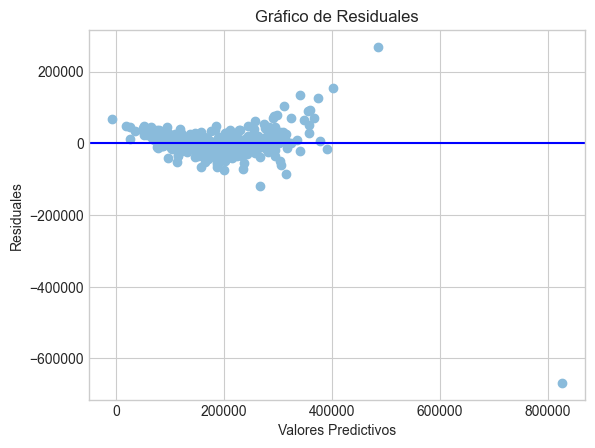

In [573]:
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

## Nuevo modelo

Separación de variables a usar

In [574]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath", "SalePrice"]

_train2 = train_data[columnas_aUsar]

print("Columnas usadas (" + str(len(_train2.columns)) + ") :\n"+ str(_train2.columns))

y = _train2.pop("SalePrice")
X = _train2

Columnas usadas (10) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath',
       'SalePrice'],
      dtype='object')


In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scalerB = StandardScaler()  # Crear el escalador

X_train_scaled = scalerB.fit_transform(X_train)
X_test_scaled = scalerB.transform(X_test)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [576]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo2 = LinearRegression()
modelo2.fit(X_train_scaled, price)
y_pred_modelo2 = modelo2.predict(X_test_scaled)


### Ecuación

In [577]:
# Obtener coeficientes e intercepto
intercept = modelo2.intercept_[0]  # Intercepto
coefs = modelo2.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 180972.9060 + (26714.4217 * OverallQual) + (7153.3194 * OverallCond) + (10948.6784 * YearBuilt) + (7684.5417 * BsmtFullBath) + (10131.9580 * TotalBsmtSF) + (27528.1411 * GrLivArea) + (10846.0724 * GarageCars) + (5010.1384 * WoodDeckSF) + (1251.9741 * FullBath)


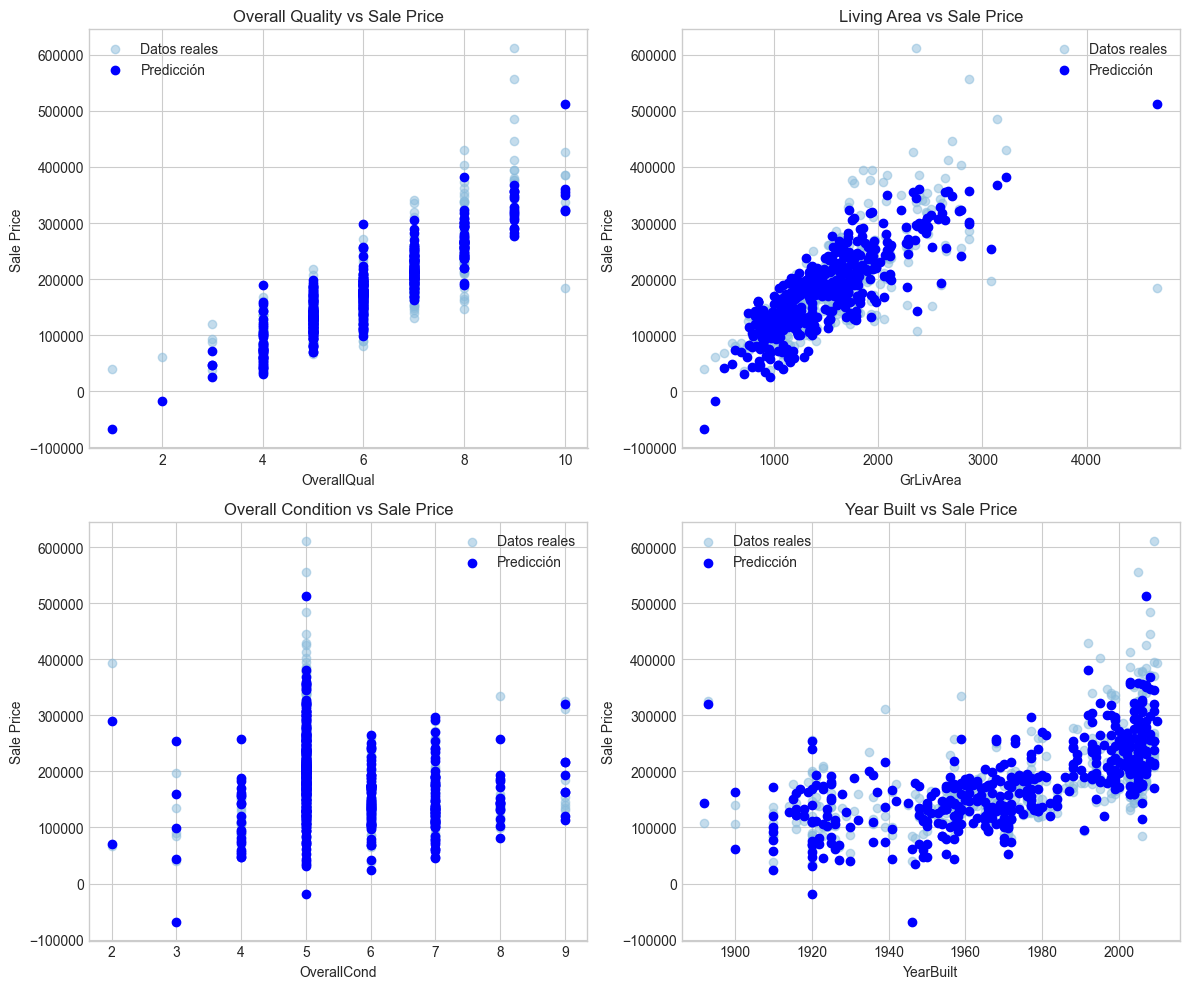

In [578]:
# Variables a graficar
variables = ["OverallQual", "GrLivArea", "OverallCond", "YearBuilt"]
titles = ["Overall Quality vs Sale Price", "Living Area vs Sale Price", 
          "Overall Condition vs Sale Price", "Year Built vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo2, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [579]:
# Regression metrics
mse_modelo2=mean_squared_error(price_t, y_pred_modelo2) 
r2_modelo2=r2_score(y_test, y_pred_modelo2)
rmse_modelo2=np.sqrt(mse_modelo2)

print('R^2: ', round(r2_modelo2,4))
print('MSE: ', round(mse_modelo2,4))
print('RMSE: ', round(rmse_modelo2,4))

R^2:  0.7787
MSE:  1373906449.0581
RMSE:  37066.2441


### Análisis de residuos

In [580]:
resid_modelo2=price_t-y_pred_modelo2
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo2)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo2[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 94
Valor real: [184750]
Valor predicho: [512966.4038757]
Diferencia máxima: [328216.4038757]


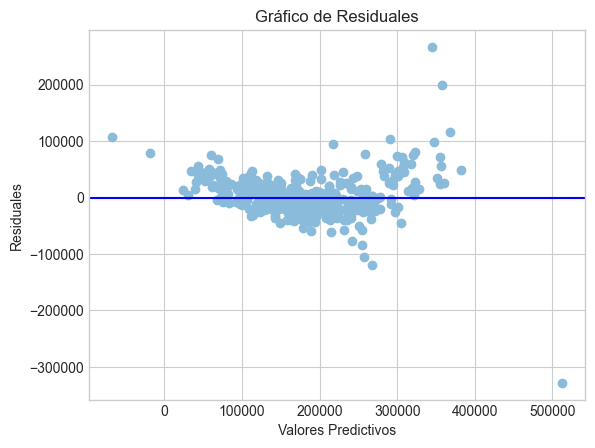

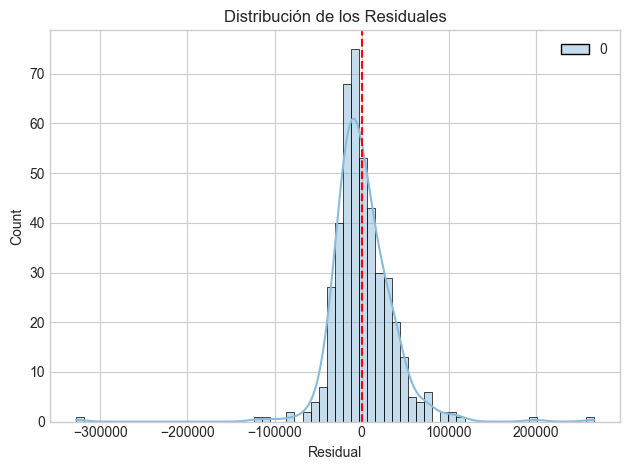

In [581]:
plt.scatter(y_pred_modelo2,resid_modelo2)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

# Distribución de los residuales
plt.figure()
sns.histplot(resid_modelo2, kde=True)
plt.title('Distribución de los Residuales')
plt.xlabel('Residual')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()

## Data Set de prueba

In [582]:
test_data=pd.read_csv("test.csv", encoding="latin1")
test_sample=pd.read_csv("sample_submission.csv", encoding="latin1")
price_theory = test_sample["SalePrice"]

Prueba con el modelo univariado

In [583]:
quality_t = test_data["OverallQual"]
quality_t = quality_t.values.reshape(-1,1)
price_pred2 = lm.predict(quality_t)

# Guardar los IDs
test_ids = test_data["Id"]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados

     Id      SalePrice
0  1461  132249.064649
1  1462  178305.328847
2  1463  132249.064649
3  1464  178305.328847
4  1465  270417.857244
5  1466  178305.328847
6  1467  178305.328847
7  1468  178305.328847
8  1469  224361.593046
9  1470   86192.800451


Prueba con el modelo de variables numericas

In [584]:
quality_t = test_data[_train.columns]

# Eliminar filas con NaN basándonos en quality_t y asegurando que price_theory tenga los mismos índices
valid_indices = quality_t.dropna().index

quality_t = quality_t.loc[valid_indices]  # Mantener solo los índices válidos en X
price_theory = price_theory.loc[valid_indices]  # Mantener los mismos índices en y

X_test_scaled = scalerA.transform(quality_t)  

# Hacer predicciones con el modelo
price_pred2 = modelo1.predict(X_test_scaled)

# Guardar los IDs
test_ids = test_data["Id"].loc[valid_indices]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados



     Id      SalePrice
0  1461  129928.603953
1  1462  158362.934523
2  1463  185190.507363
3  1464  200656.504224
4  1465  207851.280185
5  1466  173339.905209
6  1467  197313.153865
7  1468  161030.493474
8  1469  205582.699113
9  1470  111937.680800


Prueba con el último modelo

In [585]:
quality_t = test_data[_train2.columns]

# Eliminar filas con NaN basándonos en quality_t y asegurando que price_theory tenga los mismos índices
valid_indices = quality_t.dropna().index

quality_t = quality_t.loc[valid_indices]  # Mantener solo los índices válidos en X

X_test_scaled = scalerB.transform(quality_t)  

# Hacer predicciones con el modelo
price_pred2 = modelo2.predict(X_test_scaled)

# Guardar los IDs
test_ids = test_data["Id"].loc[valid_indices]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados


     Id      SalePrice
0  1461  104782.822177
1  1462  166198.916020
2  1463  170319.519508
3  1464  201250.570554
4  1465  208940.568374
5  1466  183921.027822
6  1467  209055.237587
7  1468  170183.064288
8  1469  212423.490977
9  1470  114670.562448


## Comparación final

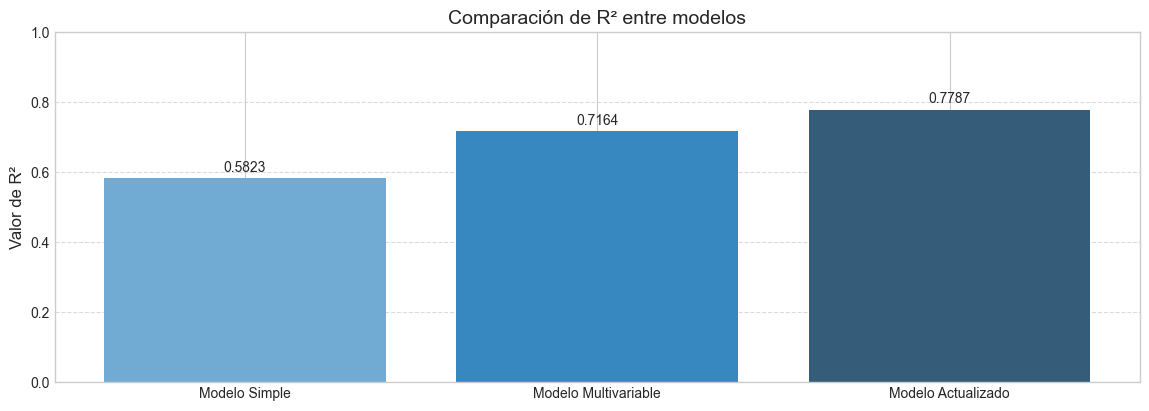

In [586]:
# Definir los datos para los tres modelos
modelos = ['Modelo Simple', 'Modelo Multivariable', 'Modelo Actualizado']

# R² de los tres modelos (reemplaza estos valores con tus datos reales)
r2_scores = [univariable_r2, r2_modelo1, r2_modelo2]  # Ejemplo: valores de R² para cada modelo

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues_d")
plt.figure(figsize=(14, 10))

# Gráfico 1: Comparación de R²
plt.subplot(2, 1, 1)
bars = plt.bar(modelos, r2_scores, color=sns.color_palette("Blues_d", 3))

# Añadir etiquetas con valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('Comparación de R² entre modelos', fontsize=14)
plt.ylabel('Valor de R²', fontsize=12)
plt.ylim(0, 1)  # R² generalmente está entre 0 y 1
plt.grid(axis='y', linestyle='--', alpha=0.7)


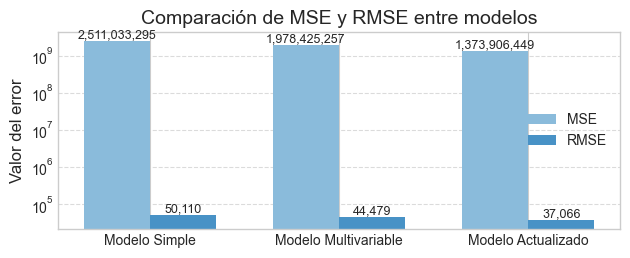

In [ ]:
# Gráfico 2: Comparación de MSE y RMSE
plt.subplot(2, 1, 2)

# MSE y RMSE para los tres modelos (reemplaza estos valores con tus datos reales)
mse_scores = [univariable_mse, mse_modelo1, mse_modelo2]
rmse_scores = [univariable_rmse, rmse_modelo1, rmse_modelo2]

# Crear posiciones para las barras agrupadas
x = np.arange(len(modelos))
width = 0.35

# Graficar MSE y RMSE
bars1 = plt.bar(x - width/2, mse_scores, width, label='MSE', color=sns.color_palette("Blues_d")[0])
bars2 = plt.bar(x + width/2, rmse_scores, width, label='RMSE', color=sns.color_palette("Blues_d")[2])

# Añadir etiquetas con valores
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{int(height):,}', ha='center', va='bottom', rotation=0, fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{int(height):,}', ha='center', va='bottom', rotation=0, fontsize=9)

plt.title('Comparación de MSE y RMSE entre modelos', fontsize=14)
plt.ylabel('Valor del error', fontsize=12)
plt.xticks(x, modelos)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar la escala logarítmica por la diferencia entre MSE y RMSE
plt.yscale('log')

plt.tight_layout()
plt.show()